In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\nikhi\\Desktop\\telco-customer-churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.drop(['customerID'], axis = 1, inplace = True)

In [10]:
df_1=df.copy()

In [11]:
#Converting total charges from object to float data type
df_1.TotalCharges=pd.to_numeric(df_1.TotalCharges,errors='coerce')
# Fill the missing values with 0
df_1['TotalCharges'] = df_1['TotalCharges'].fillna(0.0)

In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
df_1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df_1=df_1[~df_1.TotalCharges.isnull()].copy()
df_1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


([<matplotlib.patches.Wedge at 0x284b052b890>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73.5%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.5%')])

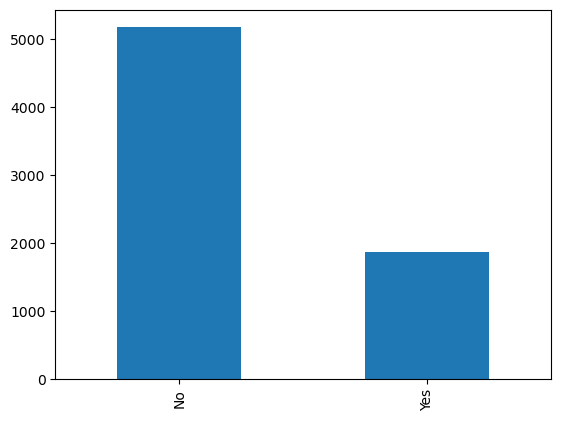

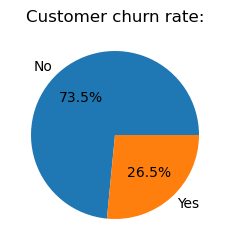

In [15]:
# Plot distribution of dependent/target variable Churn column
df['Churn'].value_counts().head().plot.bar()   # To generate a bar plot

# To generate a pie chart. Since there are only two classes, a pie chart may look more appealing
sizes = df['Churn'].value_counts(sort = True)
labels = np.unique(df.Churn)

# Visualize the data
plt.figure(figsize = (6,6))
plt.subplot(212)
plt.title("Customer churn rate:")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')

In [16]:
#converting all the data to numeric
df_1['gender'].replace(['Female','Male'],[0,1],inplace=True)
df_1['Partner'].replace(['No','Yes'],[0,1],inplace=True)
df_1['Dependents'].replace(['No','Yes'],[0,1],inplace=True)
df_1['PhoneService'].replace(['No','Yes'],[0,1],inplace=True)
df_1['MultipleLines'].replace(['No','Yes','No phone service'],[0,1,2],inplace=True)
df_1['InternetService'].replace(['DSL','Fiber optic','No'],[0,1,2],inplace=True)
df_1['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)
df_1['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)
df_1['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)
df_1['TechSupport'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)
df_1['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)
df_1['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)
df_1['PaperlessBilling'].replace(['No','Yes'],[0,1],inplace=True)
df_1['Churn'].replace(['No','Yes'],[0,1],inplace=True)
df_1['Contract'].replace(['Month-to-month','One year','Two year'],[0,1,2],inplace=True)
df_1['PaymentMethod'].replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)

In [17]:
df_1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,1,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,3,103.20,7362.90,0
7040,0,0,1,1,11,0,2,0,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,1,74.40,306.60,1


In [18]:
df_1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.615505,0.872923,0.720006,0.778220,0.777226,0.723555,0.817691,0.821241,0.690473,0.592219,1.315633,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.656039,0.737796,0.796885,0.778472,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.148907,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [19]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


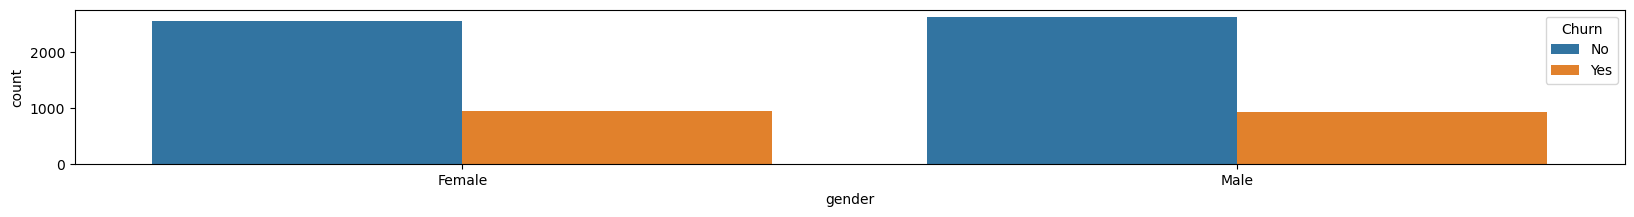

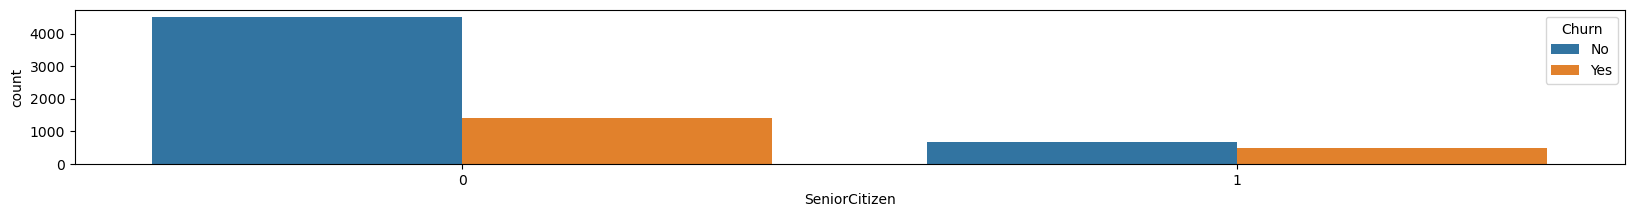

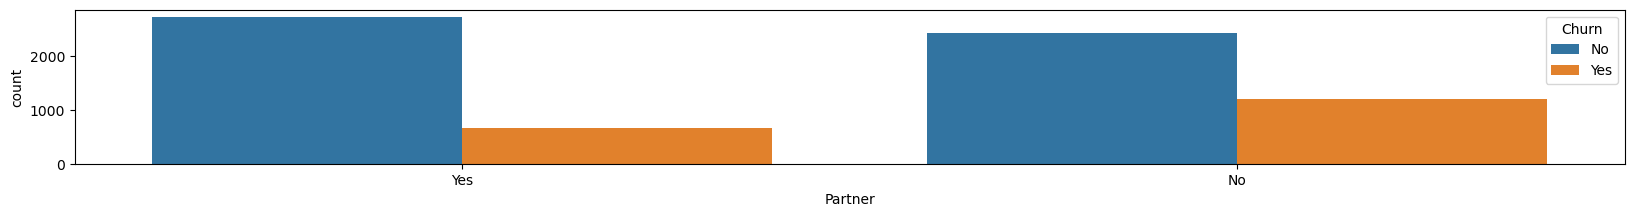

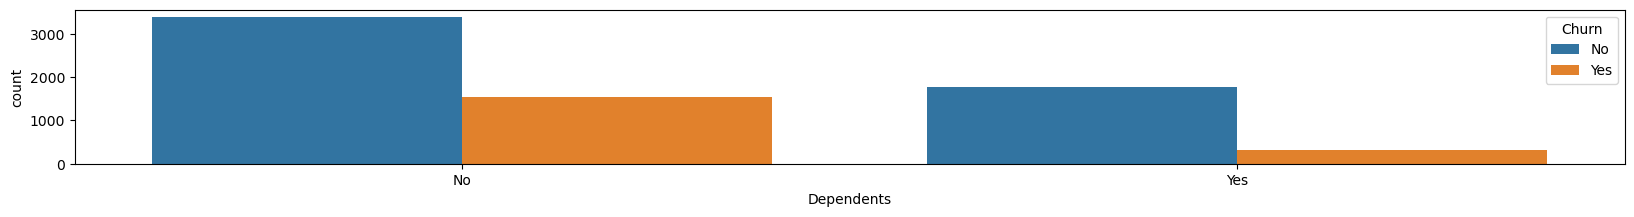

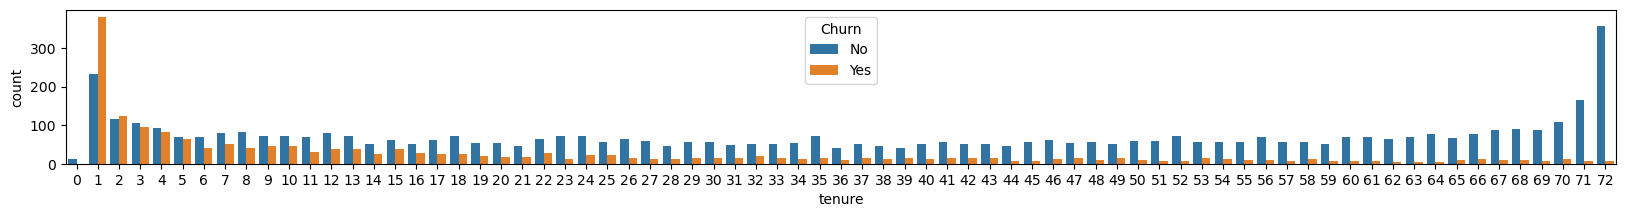

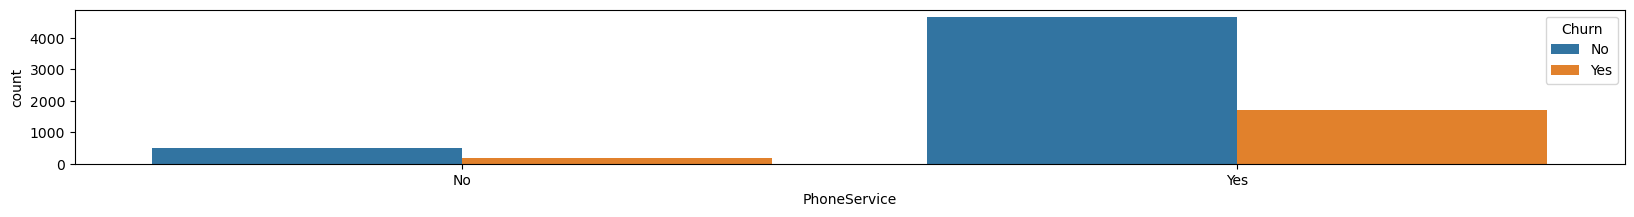

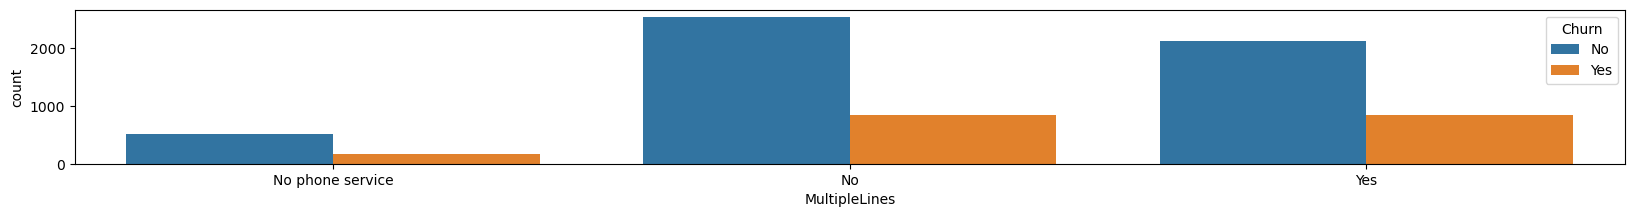

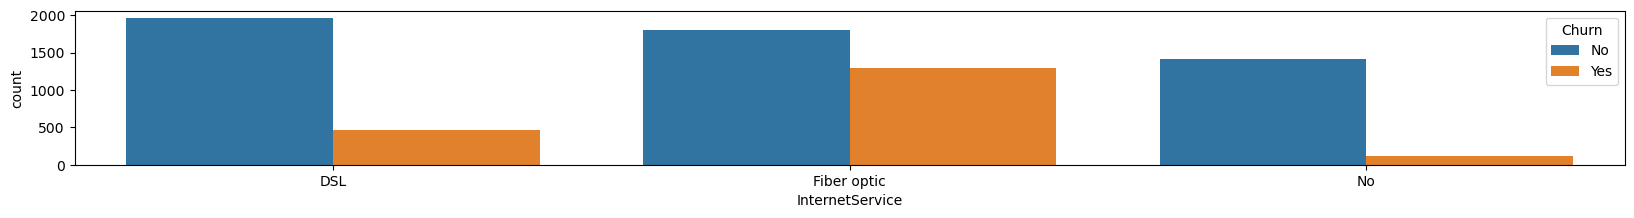

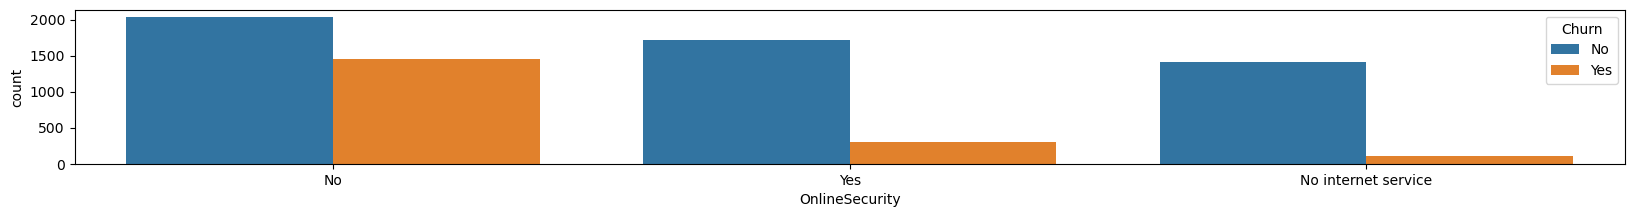

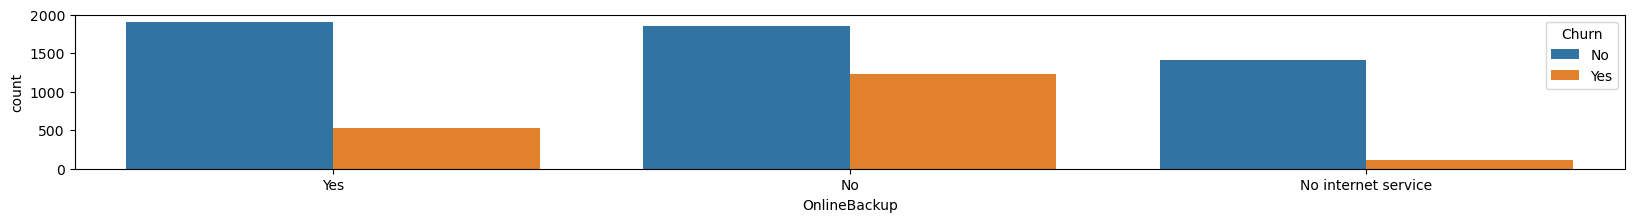

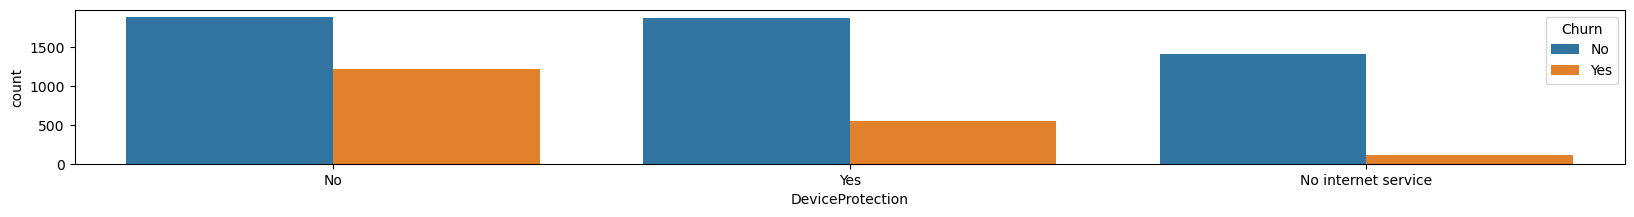

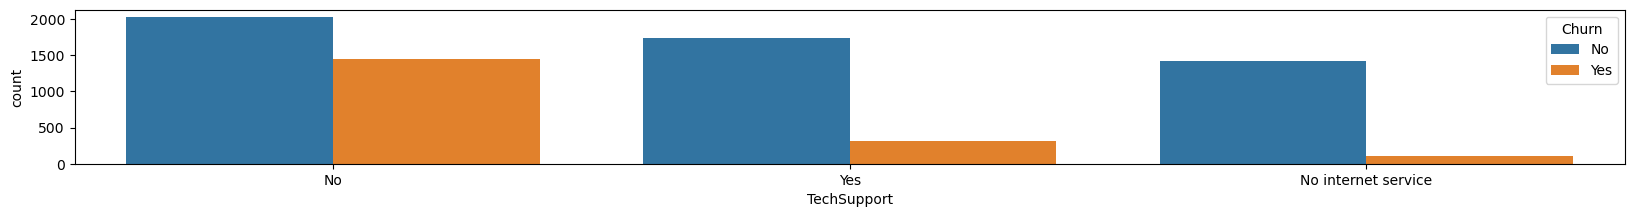

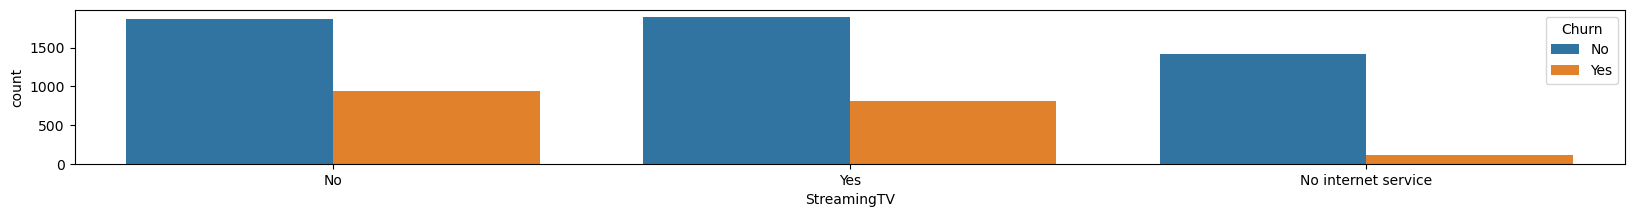

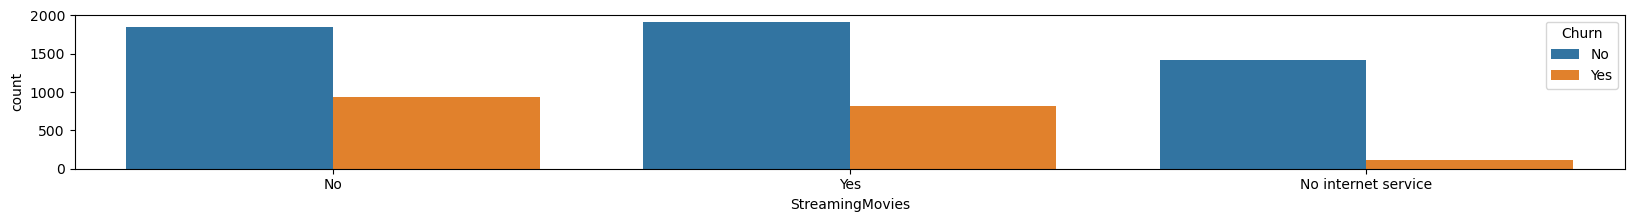

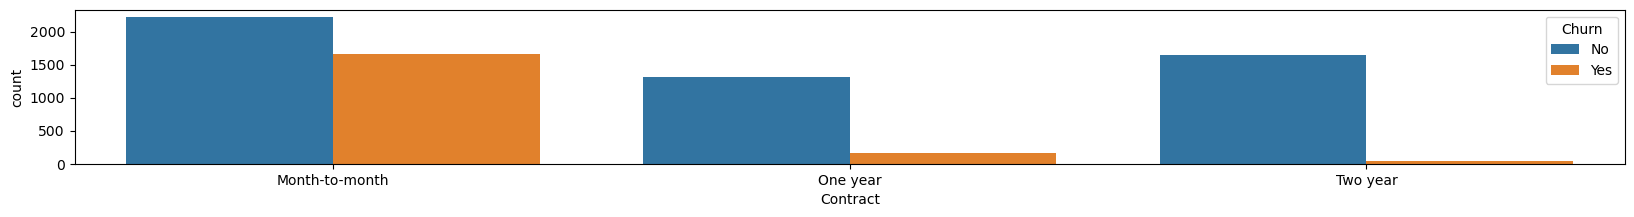

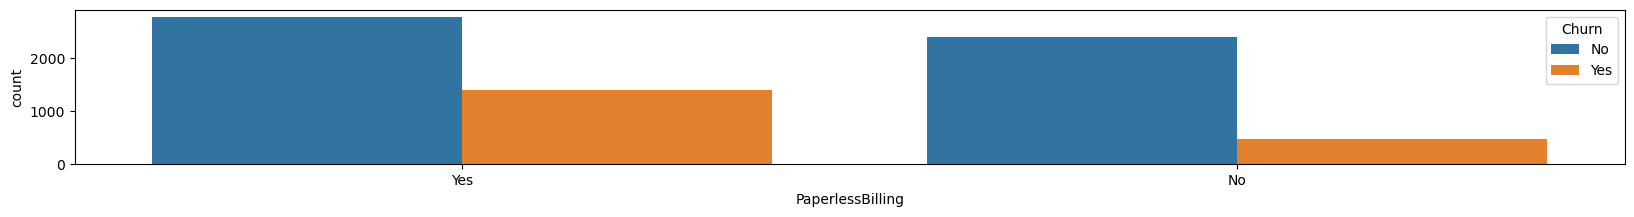

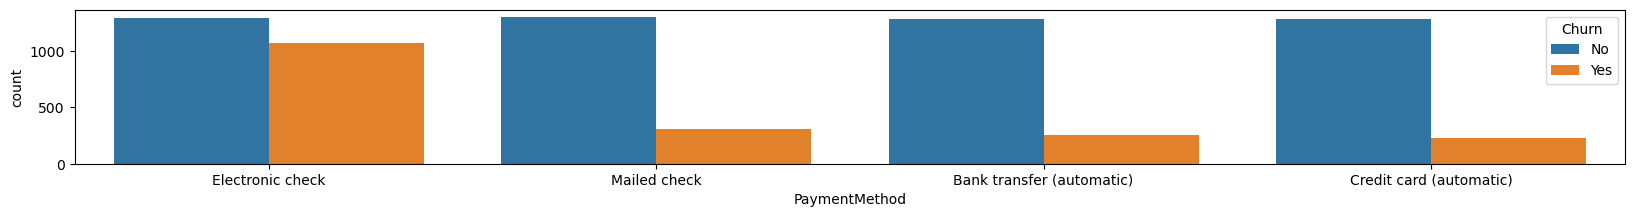

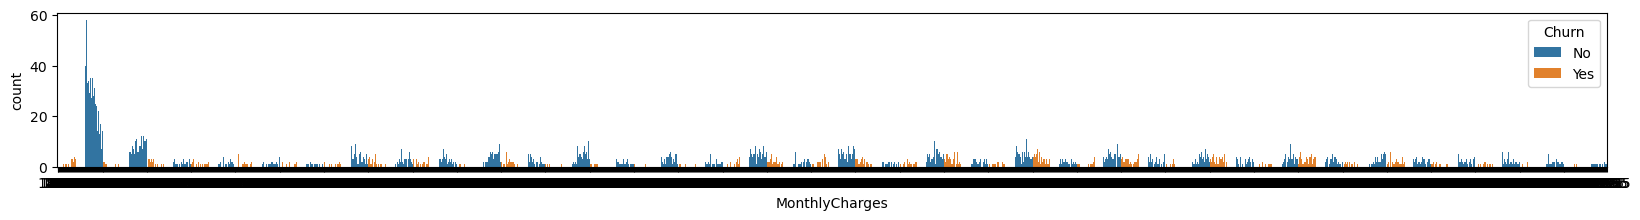

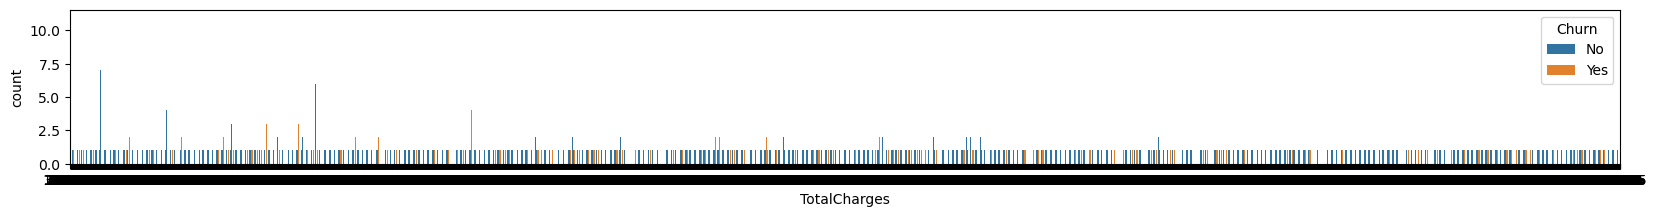

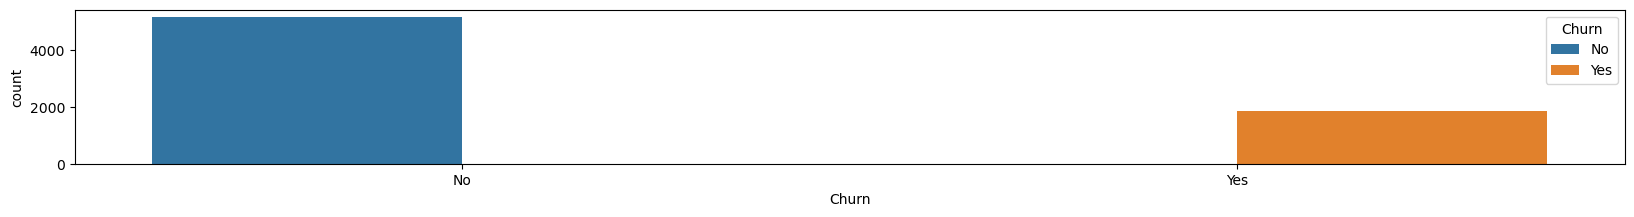

In [20]:
for i in df:
    plt.figure(figsize = (20,2))
    sns.countplot(x=df[i],hue='Churn',data=df)
    plt.show()

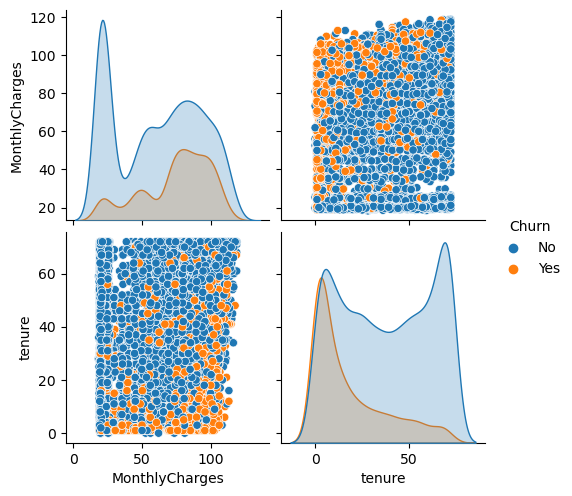

In [21]:
# Generate pairplots for all features.
highCorrCols = ['MonthlyCharges','TotalCharges','tenure', 'Churn']
sns.pairplot(df[highCorrCols], hue = 'Churn')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#splitting the data set to 80:20 ratio
df_1_train,df_1_test=train_test_split(df_1,test_size=0.2)

In [25]:
df_1_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2348,1,0,1,1,61,0,2,0,1,0,1,0,0,0,0,0,2,33.60,2117.20,0
2199,1,0,1,1,52,1,1,2,2,2,2,2,2,2,2,0,1,25.75,1345.85,0
1708,1,0,0,0,4,1,0,0,0,0,1,1,1,1,0,1,0,74.40,299.70,1
5988,1,0,1,1,12,1,0,2,2,2,2,2,2,2,2,0,2,21.05,262.05,0
859,1,0,1,1,72,0,2,0,1,1,1,1,1,1,2,1,3,64.80,4719.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,0,1,1,1,56,1,0,0,1,0,0,1,1,1,2,1,3,72.60,4084.35,0
335,1,0,1,1,68,1,1,0,0,1,1,1,0,1,1,1,2,75.80,5293.95,1
559,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,49.30,49.30,0
4033,1,0,1,1,67,1,0,0,1,1,0,1,0,0,1,0,1,60.05,3994.05,0


In [26]:
df_1_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5084,0,0,1,1,22,1,0,2,2,2,2,2,2,2,1,0,2,20.75,452.35,0
2626,0,0,1,0,60,0,2,0,1,1,1,0,0,1,1,0,0,50.05,2911.50,0
4030,0,0,0,1,5,1,0,0,0,0,0,1,0,0,0,1,1,51.00,286.80,0
1652,1,0,1,0,17,0,2,0,1,0,1,0,0,0,0,0,1,34.40,592.75,0
5957,1,1,1,0,18,1,0,1,0,0,0,0,0,1,0,0,0,78.55,1422.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,1,0,1,0,62,0,2,0,1,1,0,1,0,0,2,1,3,38.60,2345.55,0
4460,1,0,1,0,18,1,0,1,0,0,1,1,0,0,0,0,0,78.20,1468.75,0
5578,0,0,1,1,42,1,0,2,2,2,2,2,2,2,2,0,1,20.00,833.55,0
6154,0,0,1,1,72,1,1,1,0,1,1,1,1,1,2,1,2,109.20,7711.45,0


In [27]:
#pip install xgboost

In [29]:
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix
# Import Logistic Regrfession
from sklearn.linear_model import LogisticRegression
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import XGBClassifier from xgboost
from xgboost import XGBClassifier
from sklearn.metrics import recall_score

In [34]:
x=df_1.iloc[:,:-1]
y=df_1.Churn
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,0,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15
3,1,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,2,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65


In [35]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

## 1.Naive Bias

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1033
           1       0.47      0.80      0.59       376

    accuracy                           0.70      1409
   macro avg       0.68      0.73      0.68      1409
weighted avg       0.79      0.70      0.72      1409

[[689 344]
 [ 75 301]]
Recall score : 0.7026259758694109


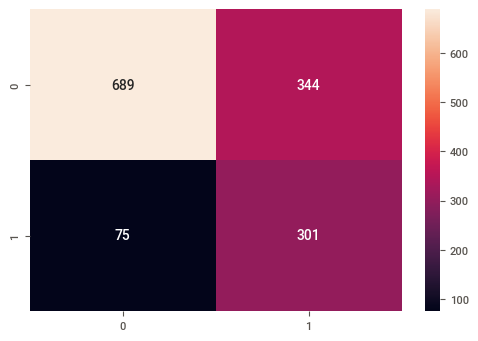

In [37]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(data=cm,annot=True,fmt='g')
rs=recall_score(y_test, y_pred, average='weighted')
print('Recall score : {}'.format(rs) )

## 2.Logistic Regression

In [38]:
import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.66      0.58      0.61       376

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

[[919 114]
 [159 217]]
Recall score : 0.8062455642299503


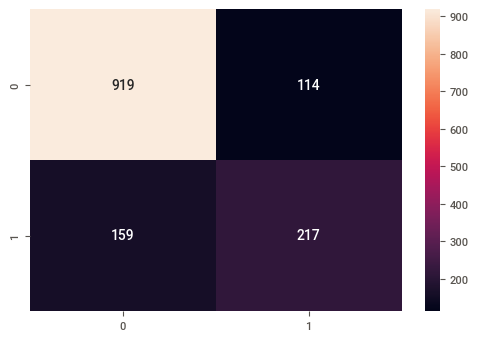

In [39]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(data=cm,annot=True,fmt='g')
rs=recall_score(y_test, y_pred, average='weighted')
a=print('Recall score : {}'.format(rs) )

## 3.Random Forest

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.55       376

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

[[928 105]
 [192 184]]
Recall score : 0.7892122072391767


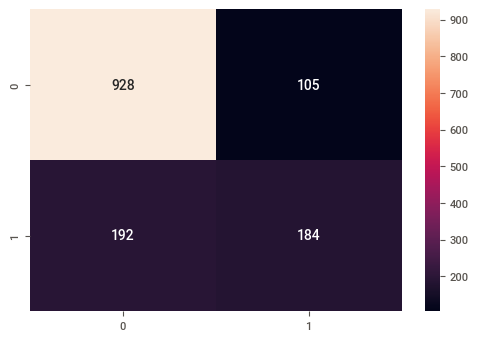

In [40]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(data=cm,annot=True,fmt='g')
rs=recall_score(y_test, y_pred, average='weighted')
print('Recall score : {}'.format(rs) )

## 4. XGBoost

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.61      0.53      0.57       376

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409

[[905 128]
 [175 201]]
Recall score : 0.7849538679914834


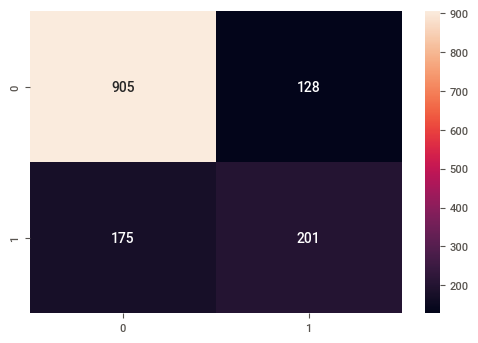

In [41]:
xgbc=XGBClassifier()
xgbc.fit(x_train,y_train)
y_pred=xgbc.predict(x_test)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(data=cm,annot=True,fmt='g')
rs=recall_score(y_test, y_pred, average='weighted')
print('Recall score : {}'.format(rs) )

## Applying SMOTE technique for imbalanced data

In [42]:
from imblearn.over_sampling import SMOTE
smote =SMOTE()

In [43]:
#applying the smote technique
x_train_smote,y_train_smote= smote.fit_resample(x_train.astype('float'),y_train)
x_test_smote,y_test_smote= smote.fit_resample(x_test.astype('float'),y_test)

In [44]:
print(y_train.value_counts())
print(y_train_smote.value_counts())

0    4141
1    1493
Name: Churn, dtype: int64
0    4141
1    4141
Name: Churn, dtype: int64


In [45]:
print(y_test.value_counts())
print(y_test_smote.value_counts())

0    1033
1     376
Name: Churn, dtype: int64
0    1033
1    1033
Name: Churn, dtype: int64


## 1.Naive Bias after smote

              precision    recall  f1-score   support

           0       0.79      0.64      0.71      1033
           1       0.70      0.83      0.76      1033

    accuracy                           0.73      2066
   macro avg       0.74      0.73      0.73      2066
weighted avg       0.74      0.73      0.73      2066

[[664 369]
 [179 854]]
Recall score : 0.7347531461761858


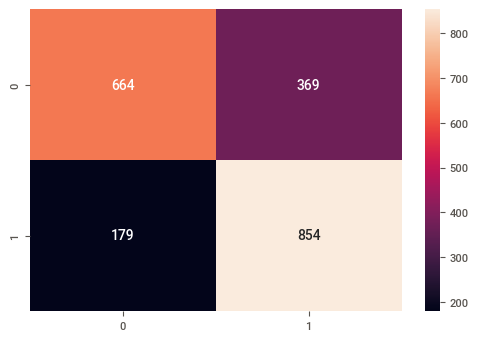

In [46]:
gnb.fit(x_train_smote,y_train_smote)
y_pred=gnb.predict(x_test_smote)
print(classification_report(y_test_smote,y_pred))
cm=confusion_matrix(y_test_smote,y_pred)
print(cm)
sns.heatmap(data=cm,annot=True,fmt='g')
rs=recall_score(y_test_smote, y_pred, average='weighted')
print('Recall score : {}'.format(rs) )

## 2.logistic regression after smote

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1033
           1       0.74      0.79      0.76      1033

    accuracy                           0.75      2066
   macro avg       0.76      0.75      0.75      2066
weighted avg       0.76      0.75      0.75      2066

[[742 291]
 [217 816]]
Recall score : 0.7541142303969022


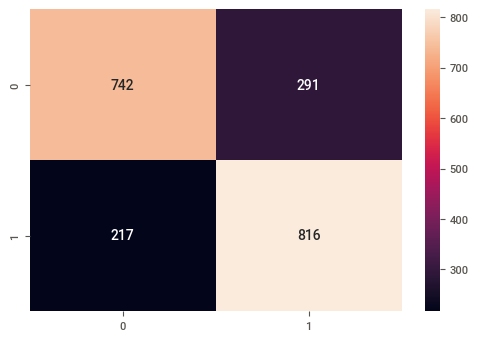

In [47]:
# fit the model with data
logreg.fit(x_train_smote,y_train_smote)
y_pred=logreg.predict(x_test_smote)
print(classification_report(y_test_smote,y_pred))
cm=confusion_matrix(y_test_smote,y_pred)
print(cm)
sns.heatmap(data=cm,annot=True,fmt='g')
rs=recall_score(y_test_smote, y_pred, average='weighted')
print('Recall score : {}'.format(rs) )

## 3.Random Forest after smote

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.87      0.81      0.84      1033

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

[[911 122]
 [196 837]]
Recall score : 0.846079380445305


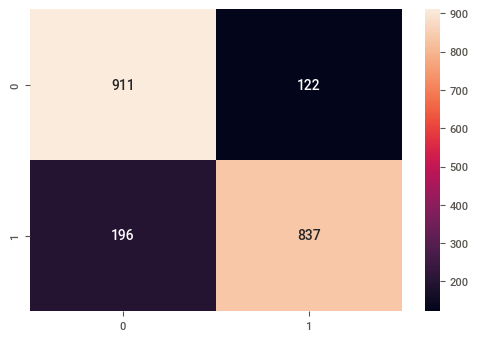

In [48]:
rfc.fit(x_train_smote,y_train_smote)
y_pred=rfc.predict(x_test_smote)
print(classification_report(y_test_smote,y_pred))
cm=confusion_matrix(y_test_smote,y_pred)
print(cm)
sns.heatmap(data=cm,annot=True,fmt='g')
rs=recall_score(y_test_smote, y_pred, average='weighted')
print('Recall score : {}'.format(rs) )

## 4. XGBoost after smote

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1033
           1       0.86      0.85      0.85      1033

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

[[890 143]
 [159 874]]
Recall score : 0.8538238141335914


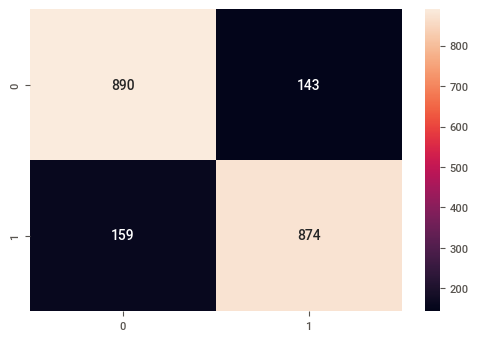

In [49]:
xgbc.fit(x_train_smote,y_train_smote)
y_pred=xgbc.predict(x_test_smote)
print(classification_report(y_test_smote,y_pred))
cm=confusion_matrix(y_test_smote,y_pred)
print(cm)
sns.heatmap(data=cm,annot=True,fmt='g')
rs=recall_score(y_test_smote, y_pred, average='weighted')
print('Recall score : {}'.format(rs) )

## Observations
1. Before applying SMOTE technique Logistic Regression has the highest Recall Value with 0.7821149751596878.
2. After applying the smote technique XGBoost has the highest recall value with 0.8462657613967022 and it is very close to Random forest classifier recall with 0.8322017458777885.
3. As per our analysis after applying the smote technique the XGBoost is the best value with great recall and accuracy score to find out whether the customer is going to churn or not.